In [1]:
import numpy as np
import pandas as pd

In [49]:

# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff

In [50]:
import plotly.graph_objs as go
import chart_studio.plotly as py


In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:

df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

# Data preparation

In [53]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [54]:
df.shape

(2075259, 7)

In [55]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [56]:
df[df.Global_active_power.isna()].head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-28 17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25 17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NA values seem to be distributed randomly. 

### Filling NA values with front fill

In [57]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(method='ffill')

In [58]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [59]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Analyzing daily data

In [60]:

trace0=go.Scatter(
        y=df.Global_active_power.resample("D").sum(),
        x=df.Global_active_power.resample("D").sum().index,
        mode='lines',
        marker=dict(
        color="red",
        size=5,
        opacity=0.5
        ),
        name="Global active power daily"
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Global daily consumption",
        yaxis=dict(title="Consumption kWh"),
        xaxis=dict(title="Date")

    
    ))
iplot(figure)

## Analyzing 15 min data from last month

In [61]:
last_month_threshold=df.Global_active_power.resample("D").sum().tail(30).index[0]

In [62]:
last_month_threshold

Timestamp('2010-10-28 00:00:00', freq='D')

In [63]:
df_30_days=df[df.index>=last_month_threshold]

In [64]:

trace0=go.Scatter(
        y=df_30_days.Global_active_power,
        x=df_30_days.index,
        mode='lines',
        marker=dict(
        color="red",
        size=5,
        opacity=0.5
        ),
        name="Global active power daily"
    )








data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Global 15-min consumption",
        yaxis=dict(title="Consumption kWh"),
        xaxis=dict(title="Date")

    
    ))
iplot(figure)

# # Transforming data to hourly, standarization, matrix suitable for RNN

In [104]:
df_h=df.resample("h").sum()

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

values_scaled=scaler.fit_transform(df_h.values)

df_scaled=pd.DataFrame(values_scaled, columns=df.columns)

In [106]:
def create_sequence(df,l):
    X=df.values[:l-1,:]
    X=X.reshape(X.shape[0],1,X.shape[1])
    y=df.values[1:l,0]
    y=y.reshape(len(y),1,1)
    
    
    return X,y
    

In [88]:
train_t=24*360*2
test_t=30*24

In [89]:
X,y=create_sequence(df_scaled,train_t+test_t)

In [90]:
y.shape

(17999, 1, 1)

In [91]:
X.shape

(17999, 1, 7)

In [92]:

X_train, X_test, y_train, y_test=X[:train_t,:,:],X[train_t:train_t+test_t,:,:],y[:train_t,:],y[train_t:train_t+test_t,:]

In [93]:
X_train.shape

(17280, 1, 7)

In [95]:
X_test.shape

(719, 1, 7)

# Building and training model

In [96]:
model = keras.models.Sequential([
    keras.layers.LSTM(100),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1)
])

In [97]:
#optimizer = keras.optimizers.Adam(lr=0.006)
model.compile(loss="mse", optimizer="adam")

In [98]:
history = model.fit(X_train, y_train, epochs=20,batch_size=100,
                    validation_data=(X_test, y_test))

Train on 17280 samples, validate on 719 samples
Epoch 1/20
17280/17280 [==============================] - 2s 144us/sample - loss: 0.6516 - val_loss: 0.5507
Epoch 2/20
17280/17280 [==============================] - 1s 40us/sample - loss: 0.5158 - val_loss: 0.5207
Epoch 3/20
17280/17280 [==============================] - 1s 42us/sample - loss: 0.5079 - val_loss: 0.5124
Epoch 4/20
17280/17280 [==============================] - 1s 40us/sample - loss: 0.5033 - val_loss: 0.5082
Epoch 5/20
17280/17280 [==============================] - 1s 40us/sample - loss: 0.5015 - val_loss: 0.5061
Epoch 6/20
17280/17280 [==============================] - 1s 40us/sample - loss: 0.4998 - val_loss: 0.5055
Epoch 7/20
17280/17280 [==============================] - 1s 46us/sample - loss: 0.4995 - val_loss: 0.5014
Epoch 8/20
17280/17280 [==============================] - 1s 44us/sample - loss: 0.4983 - val_loss: 0.5019
Epoch 9/20
17280/17280 [==============================] - 1s 43us/sample - loss: 0.4983 - val_l

In [99]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

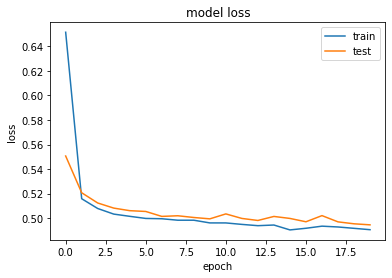

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [101]:
from sklearn.metrics import mean_squared_error

# Validating results

In [102]:
# make a prediction

yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, -6:]), axis=1)

inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 37.756


In [103]:
l=200
idx=[x for x in range(l)]
trace0=go.Scatter(
        y=inv_y[:l],
        x=idx,
        mode='lines',
        marker=dict(
        color="red",
        size=5,
        opacity=0.5
        ),
        name="Actual consumption"
    )


trace1=go.Scatter(
        y=inv_yhat[:l],
        x=idx,
        mode='lines',
        marker=dict(
        color="blue",
        size=5,
        opacity=0.5
        ),
        name="Predicted consumption"
    )








data=[trace0,trace1]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Global 15-min consumption",
        yaxis=dict(title="Consumption kWh"),
        xaxis=dict(title="Date")

    
    ))
iplot(figure)